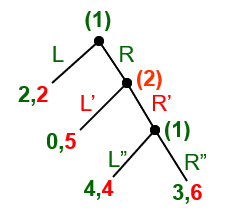

In [1]:
import random
from collections import defaultdict

ACTIONS = ["L", "R"]
EPSILON = 0.1
ALPHA = 0.3
GAMMA = 0.9
DEFAULT_Q = 1

payoff1 = {('L',): 2, ('R', 'L'): 0, ('R', 'R', 'L'): 4, ('R', 'R', 'R'): 3}
payoff2 = {('L',): 2, ('R', 'L'): 5, ('R', 'R', 'L'): 4, ('R', 'R', 'R'): 6}

class tree1:
    def __init__(self, player1, player2):
        self.player1 = player1
        self.player2 = player2
        self.first = True
        self.board = []
    def play(self):
       while True:
            if self.first:
                player = self.player1
            else:
                player = self.player2

            self.first = not self.first
            self.board.append(player.make_move(self.board))

            
            p1 = payoff1.get(tuple(self.board))
            p2 = payoff2.get(tuple(self.board))
            if p1 is not None:
                self.player1.reward(p1, tuple(self.board))
                self.player2.reward(p2, tuple(self.board))

                print("Phan thuong n1: ", p1)
                print("Phan thuong n2: ", p2)
                break
            else:
                continue
                

class AIplayer:
    def __init__(self):
        self.q = defaultdict(lambda: DEFAULT_Q)
        self.board = (' ',)
        self.move = None

    def make_move(self, state):
        self.board = tuple(state)
        if random.random() < EPSILON:
            self.move = random.choice(ACTIONS)
        else:
            q_values = [self.get_q(self.board, a) for a in ACTIONS]
            max_q_value = max(q_values)
            best_actions = [i for i in range(len(ACTIONS)) if q_values[i] == max_q_value]
            best_move = ACTIONS[random.choice(best_actions)]
            self.move = best_move
        return self.move

    def get_q(self, state, action):
        return self.q[(state, action)]

    def reward(self, reward, state):
        if self.move:
            prev_q = self.get_q(self.board, self.move)
            max_q_new = max([self.get_q(tuple(state), a) for a in ACTIONS])
            self.q[(self.board, self.move)] = prev_q + ALPHA * (reward + GAMMA * max_q_new - prev_q)


class HumanPlayer:

    def reward(self, value, board):
        pass

    def make_move(self, board):
        move = input('L or R: ')
        return move
   

In [2]:
ai_player_1 = AIplayer()

print('Training the AI player(s)...')

ai_player_1.EPSILON = 0.1

for _ in range(100000):
    game = tree1(ai_player_1,ai_player_1)
    game.play()

print('\nTraining is Done')    

Training the AI player(s)...
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Phan thuong n2:  2
Phan thuong n1:  2
Ph

In [5]:
ai_player_1.EPSILON = 0
game = tree1(HumanPlayer(),ai_player_1)
game.play()

Phan thuong n1:  0
Phan thuong n2:  5
